# Classification and Model Representation

## 1. Classification problems

In contrast to regression problems, the output $y$ is discrete-valued.

Some examples are:

- Email: Spam / Not Spam?
- Online Transactions: Fraudulent (Yes / No)?
- Tumor: Malignant / Benign?

In all these problems we can associate a variable

$$
y \in \{0, 1\}
$$

where $0$ represents the *Negative Class* and $1$ stands for the *Positive Class*.

The type of classification problems where the output is binary is called **binary classification problems**, whereas the problems where the output may take more than two values are called **multiclass classification problems**.

What if we try to address this problem using linear regression?

In [1]:
# Import libraries
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

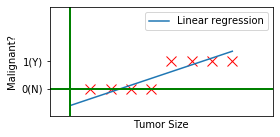

In [2]:
# Draw cancer data
plt.figure(figsize=(4, 2))
x_b = np.array([1, 2, 3, 4])
x_m = np.array([5, 6, 7, 8])
y_b = np.array([0, 0, 0, 0])
y_m = np.array([1, 1, 1, 1])
plt.plot(x_b, y_b, 'rx', ms=10)
plt.plot(x_m, y_m, 'rx', ms=10)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
x_fit1 = np.linspace(0, 8)
y_fit1 = 0.25 * (x_fit1 - 2.5)
plt.plot(x_fit1, y_fit1, label='Linear regression')
plt.yticks([0, 1], ['0(N)', '1(Y)'])
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axis([-1, 10, -1, 3])
plt.xlabel('Tumor Size')
plt.ylabel('Malignant?')
plt.legend(loc='best')

1. We know that the hypothesis $h_{\theta}(x)$ takes values below $0$ and above $1$.
2. We could propose that:
   - If $h_{\theta}(x) \geq 0.5$, then predict $y = 1$.
   - If $h_{\theta}(x) < 0.5$, then predict $y = 0$.
   
In this case, all seems ok:

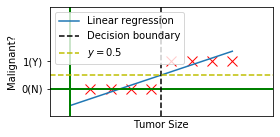

In [3]:
# Draw cancer data
plt.figure(figsize=(4, 2))
x_b = np.array([1, 2, 3, 4])
x_m = np.array([5, 6, 7, 8])
y_b = np.array([0, 0, 0, 0])
y_m = np.array([1, 1, 1, 1])
plt.plot(x_b, y_b, 'rx', ms=10)
plt.plot(x_m, y_m, 'rx', ms=10)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
x_fit1 = np.linspace(0, 8)
y_fit1 = 0.25 * (x_fit1 - 2.5)
plt.plot(x_fit1, y_fit1, label='Linear regression')
plt.yticks([0, 1], ['0(N)', '1(Y)'])
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axvline(x=4.5, c='k', ls='--', label='Decision boundary')
plt.axhline(y=0.5, c='y', ls='--', label='$y=0.5$')
plt.axis([-1, 10, -1, 3])
plt.xlabel('Tumor Size')
plt.ylabel('Malignant?')
plt.legend(loc='best')

However, if we have some outlier training example:

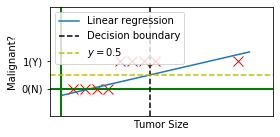

In [4]:
# Draw cancer data
plt.figure(figsize=(4, 2))
x_b = np.array([1, 2, 3, 4])
x_m = np.array([5, 6, 7, 8, 15])
y_b = np.array([0, 0, 0, 0])
y_m = np.array([1, 1, 1, 1, 1])
plt.plot(x_b, y_b, 'rx', ms=10)
plt.plot(x_m, y_m, 'rx', ms=10)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
x_fit1 = np.linspace(0, 16)
y_fit1 = 0.1 * (x_fit1 - 2.5)
plt.plot(x_fit1, y_fit1, label='Linear regression')
plt.yticks([0, 1], ['0(N)', '1(Y)'])
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.axvline(x=7.5, c='k', ls='--', label='Decision boundary')
plt.axhline(y=0.5, c='y', ls='--', label='$y=0.5$')
plt.axis([-1, 18, -1, 3])
plt.xlabel('Tumor Size')
plt.ylabel('Malignant?')
plt.legend(loc='best')

The classifier performance turns out to be really bad.

Then, we should think of a hypothesis that satisfies $0 \leq h_{\theta}(\boldsymbol{x}) \leq 1$.

## 2. Hypothesis Representation

Then we want a hypothesis such that $0 \leq h_{\theta}(\boldsymbol{x}) \leq 1$.

We're going to modify the linear regression hypothesis a bit to come up with the **logistic regression** hypothesis:

$$
h_{\theta}(\boldsymbol{x}) = g(\boldsymbol{\theta}^T\boldsymbol{x}),
$$

where

$$
g(z) = \frac{1}{1 + e^{-z}},
$$

and $g(\cdot):\mathbb{R} \to (0, 1)$ is called a **Sigmoid function**.

How does $g$ look like?

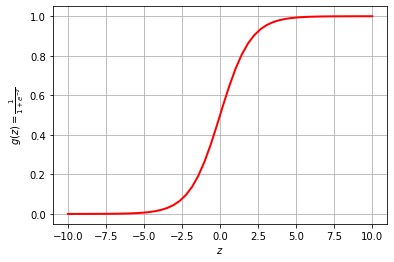

In [5]:
plt.figure(figsize=(6, 4))
z = np.linspace(-10, 10)
g = 1 / (1 + np.exp(-z))
plt.plot(z, g, 'r', lw=2)
plt.xlabel('$z$')
plt.ylabel(r'$g(z)=\frac{1}{1+e^{-z}}$')
plt.grid()

Given this representation, we interpret $h_{\theta}(\boldsymbol{x})$ as the estimated probability that $y=1$ given the input $\boldsymbol{x}$. This is:

$h_{\theta}(\boldsymbol{x}) = \hat{P}(y=1|\boldsymbol{x};\boldsymbol{\theta}).$

## 3. Decision boundary

Recall the logistic regression hypothesis is:

$$
h_{\theta}(\boldsymbol{x}) = g(\boldsymbol{\theta}^T\boldsymbol{x}),
$$

where

$$
g(z) = \frac{1}{1 + e^{-z}},
$$

Even now that we have $0 \leq h_{\theta}(\boldsymbol{x}) \leq 1$, we must be able to predict either $y = 1$ or $y=0$.

Based on our interpretation of $h_{\theta}$, it is reasonable to predict $y=1$ if $h_{\theta}(\boldsymbol{x}) \geq 0.5$.

Looking at the plot of the sigmoid function, $g(z) \geq 0.5$ when $z \geq 0$. Thus, we will predict $y = 1$ when

$$
\boldsymbol{\theta}^T \boldsymbol{x} \geq 0.
$$

Conversely, we will predict $y = 0$ if $h_{\theta}(\boldsymbol{x}) < 0.5$, this is:

$$
\boldsymbol{\theta}^T \boldsymbol{x} < 0.
$$

For example, let's consider the following set of points:

[-0.5, 4, -0.5, 4]

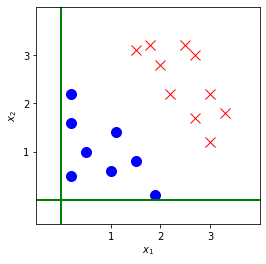

In [6]:
# Draw linearly separable data
plt.figure(figsize=(4, 4))
x_b = np.array([[1.5, 1.8, 2.0, 2.2, 2.5, 2.7, 2.7, 3.0, 3.0, 3.3],
                [3.1, 3.2, 2.8, 2.2, 3.2, 1.7, 3.0, 2.2, 1.2, 1.8]]).T
x_m = np.array([[0.2, 0.2, 0.2, 0.5, 1.0, 1.1, 1.5, 1.9],
                [2.2, 1.6, 0.5, 1.0, 0.6, 1.4, 0.8, 0.1]]).T
plt.plot(x_b[:, 0], x_b[:, 1], 'rx', ms=10)
plt.plot(x_m[:, 0], x_m[:, 1], 'bo', ms=10)
x_fit1 = np.linspace(0, 16)
y_fit1 = 0.1 * (x_fit1 - 2.5)
plt.yticks([1, 2, 3])
plt.xticks([1, 2, 3])
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-0.5, 4, -0.5, 4])

For this example, we may set the following hypothesis function:

$$
h_{\theta}(\boldsymbol{x}) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2),
$$

which after some procedure for fitting the parameter values, we get $\theta_0=-3$, $\theta_1=\theta_2=1$.

Then, we will predict $y=1$ if 

$$
-3 + x_1 + x_2 \geq 0 \Leftrightarrow x_1+x_2 \geq 3,
$$

and $y=0$ if

$$
x_1 + x_2 < 3.
$$

Thus, the line $x_1 + x_2 = 3$ is called the **decision boundary**, and separates the points which will be predicted as $y=1$ and those which will be predicted as $y=0$.

[-0.5, 4, -0.5, 4]

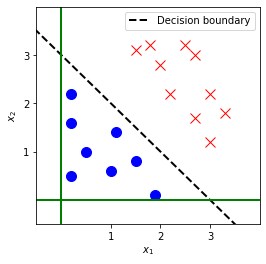

In [7]:
# Draw linearly separable data
plt.figure(figsize=(4, 4))
x_b = np.array([[1.5, 1.8, 2.0, 2.2, 2.5, 2.7, 2.7, 3.0, 3.0, 3.3],
                [3.1, 3.2, 2.8, 2.2, 3.2, 1.7, 3.0, 2.2, 1.2, 1.8]]).T
x_m = np.array([[0.2, 0.2, 0.2, 0.5, 1.0, 1.1, 1.5, 1.9],
                [2.2, 1.6, 0.5, 1.0, 0.6, 1.4, 0.8, 0.1]]).T
plt.plot(x_b[:, 0], x_b[:, 1], 'rx', ms=10)
plt.plot(x_m[:, 0], x_m[:, 1], 'bo', ms=10)
x_fit1 = np.linspace(-1, 4)
y_fit1 = -x_fit1 + 3
plt.plot(x_fit1, y_fit1, 'k--', lw=2, label='Decision boundary')
plt.yticks([1, 2, 3])
plt.xticks([1, 2, 3])
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.axis([-0.5, 4, -0.5, 4])

The decision boundary has not to be linear. For instance, consider the following training set

[-3, 3, -3, 3]

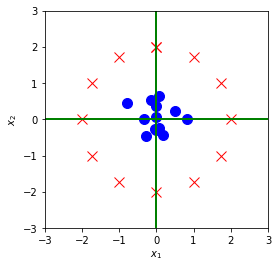

In [11]:
# Draw non-linearly separable data
plt.figure(figsize=(4, 4))
t = np.linspace(0, 2 * np.pi, 13)
x_b = 2 * np.array([np.sin(t), np.cos(t)]).T
x_m = (np.random.rand(2, 13) * np.array([np.sin(t), np.cos(t)])).T
plt.plot(x_b[:, 0], x_b[:, 1], 'rx', ms=10)
plt.plot(x_m[:, 0], x_m[:, 1], 'bo', ms=10)
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-3, 3, -3, 3])

and set the hypothesis function 

$$
h_{\theta}(\boldsymbol{x}) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_1x_2 + \theta_5 x_2^2),
$$

which after some procedure for fitting the parameter values, we get $\theta_0=1$, $\theta_1=\theta_2=\theta_4=0$, and $\theta_3 = \theta_5 = 1$.

Then, the decision boundary looks like:

[-3, 3, -3, 3]

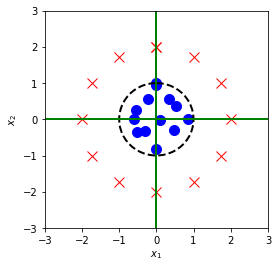

In [10]:
# Draw linearly separable data
plt.figure(figsize=(4, 4))
t = np.linspace(0, 2 * np.pi, 13)
x_b = 2 * np.array([np.sin(t), np.cos(t)]).T
x_m = (np.random.rand(2, 13) * np.array([np.sin(t), np.cos(t)])).T
plt.plot(x_b[:, 0], x_b[:, 1], 'rx', ms=10)
plt.plot(x_m[:, 0], x_m[:, 1], 'bo', ms=10)
t2 = np.linspace(0, 2 * np.pi)
db = np.array([np.sin(t2), np.cos(t2)]).T
plt.plot(db[:, 0], db[:, 1], 'k--', lw=2, label='Decision boundary')
plt.axhline(y=0, c='g', lw=2)
plt.axvline(x=0, c='g', lw=2)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axis([-3, 3, -3, 3])

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez. Based on the content of the Machine Learning course offered through coursera by Prof. Andrew Ng.
</footer>